# Exercise 5: Cloning quasars

- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

(Hint: `scipy.stats` is your best friend)

- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data 

(Hint: `astropy.cosmology` is another close friend). The best-fit cosmological model from the Planck data is:

---

In [1]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

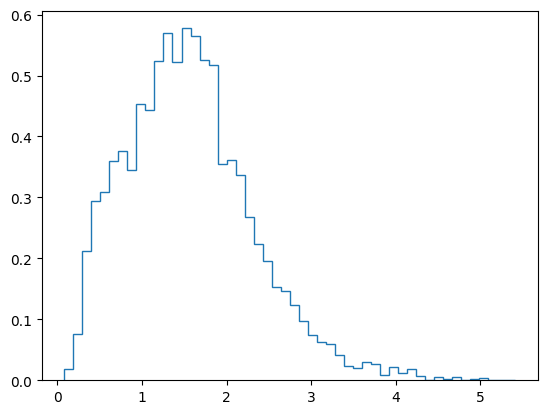

In [2]:
import matplotlib as mpl
import pylab as plt
import numpy as np

bins = 50
counts, edges, patches = plt.hist(z,bins=bins,density=True, histtype='step')

## Rejection sampling with rv_histogram


Note: interesting behaviour if N is very high (N = 10000000) and bins='auto' : the resulting sample mantains the "roughness" of the starting histogram binning.

In [3]:
from scipy import stats
N = 20000
dist = stats.rv_histogram((counts,edges))

x = rng.uniform(0, xmax, N)
y = rng.uniform(0, ymax, N)

good_points = x[y<=dist.pdf(x)]

z_upsampled = np.concatenate((z,good_points))

h1=plt.hist(z_upsampled,bins='auto',density=True, histtype='step', label='true rejection method')
h2=plt.hist(dist.rvs(size=N),bins='auto',density=True,histtype='step',label='dist.rvs() method')
plt.legend()

NameError: name 'rng' is not defined

## Rejection sampling with interpolated pdf

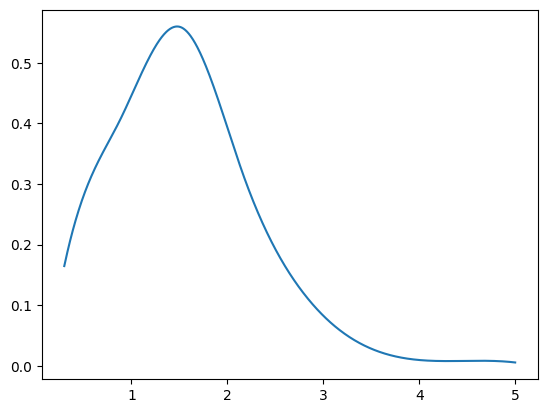

In [ ]:
import scipy.interpolate as interp

#algorithm taken from fig 3.25, used to interpolate the cumulative dist

centers = (edges[:-1] + edges[1:]) / 2
tck = interp.splrep(centers, counts, s=0.02) # added smoothing factor
interp_pdf = interp.splev # function that interpolates pdf value when given an x

# Plot interpolated function
x_grid = np.linspace(0.3,5,1000)
y_interp = interp_pdf(x_grid, tck)
plt.plot(x_grid, y_interp)

KS test: D = 0.0025; p = 1


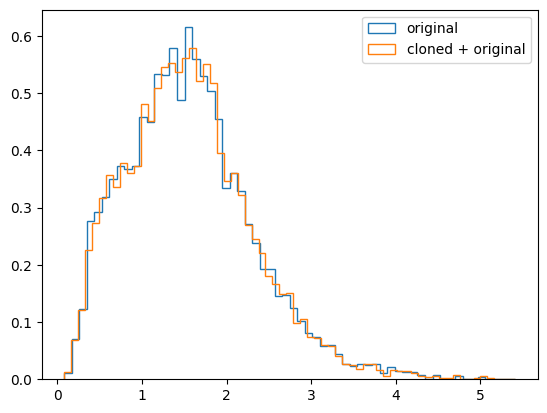

In [ ]:
rng = np.random.default_rng(404) 
N = 10000 # number of draws

ymax = counts.max()
xmax = edges.max()

x = rng.uniform(0, xmax, N)
y = rng.uniform(0, ymax, N)

good_points = x[y<=interp_pdf(x,tck)]

z_upsampled = np.concatenate((z,good_points))

D, p = stats.ks_2samp(z, z_upsampled)
print("KS test: D = %.2g; p = %.2g" % (D, p))

# Plot
fig, ax = plt.subplots()

hist_true = ax.hist(z,bins='auto',density=True, histtype='step', label='original')
hist = ax.hist(z_upsampled,bins='auto',density=True, histtype='step', label='cloned + original')
ax.legend()

## 2 Inverse transfom

In [ ]:
from astroML.density_estimation import EmpiricalDistribution

# We can clone the distribution easily with this function
N = 30000
z_cloned = EmpiricalDistribution(z).rvs(N)

# compute the KS test to check if they're the same
D, p = stats.ks_2samp(z, z_cloned)
print("KS test: D = %.2g; p = %.2g" % (D, p))

KS test: D = 0.004; p = 1


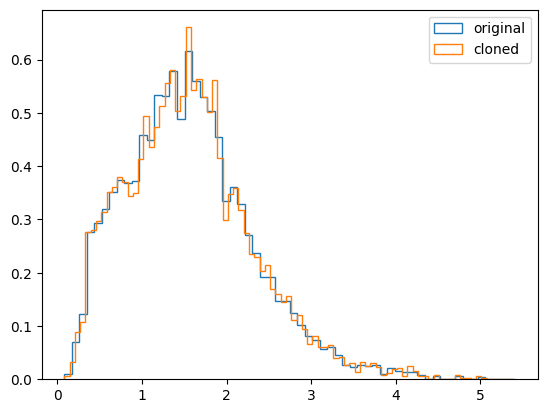

In [ ]:
fig, ax = plt.subplots()
hist_true = ax.hist(z,bins='auto',density=True, histtype='step', label='original')
hist_clone = ax.hist(z_cloned,bins='auto',density=True, histtype='step', label='cloned')
ax.legend()

## Quasar distribution
Conside quasars as uniformly distributed in the comoving volume

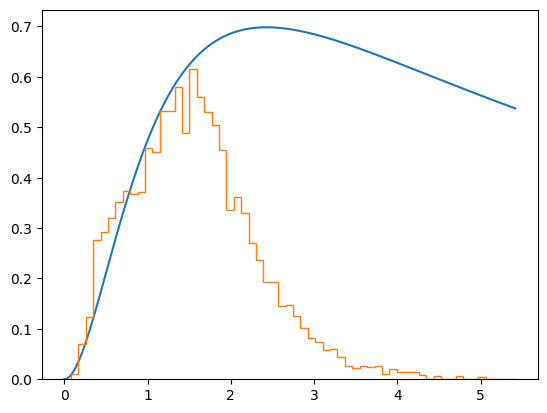

In [10]:
import astropy.cosmology as cosmo
import scipy. integrate as integ

def func(z_vals):
    return 4.*np.pi*cosmo.Planck15.differential_comoving_volume(z_vals).value

zmax = max(z)
diff_com_vol = func(z)
norm = integ.quad(func,0,zmax)[0]

def norm_pdf(z_vals):
    return func(z_vals) / norm

z_grid = np.linspace(0,zmax, 1000)

plt.plot(z_grid, 3*norm_pdf(z_grid))
hist_true = plt.hist(z,bins='auto',density=True, histtype='step', label='original')